In [1]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.config import INPUT_PATH, OUTPUT_PATH

In [55]:
batch = pd.read_parquet(INPUT_PATH / "train" / "batch_100.parquet")

In [56]:
time_reset = batch["time"] - batch.groupby("event_id")["time"].min()

In [57]:
time_reset.describe()

count    3.299884e+07
mean     6.196013e+03
std      3.095932e+03
min      0.000000e+00
25%      4.324000e+03
50%      5.479000e+03
75%      7.294000e+03
max      4.127400e+04
Name: time, dtype: float64

In [58]:
((time_reset - 6000) / 6000).describe()

count    3.299884e+07
mean     3.266879e-02
std      5.159887e-01
min     -1.000000e+00
25%     -2.793333e-01
50%     -8.683333e-02
75%      2.156667e-01
max      5.879000e+00
Name: time, dtype: float64

<AxesSubplot: >

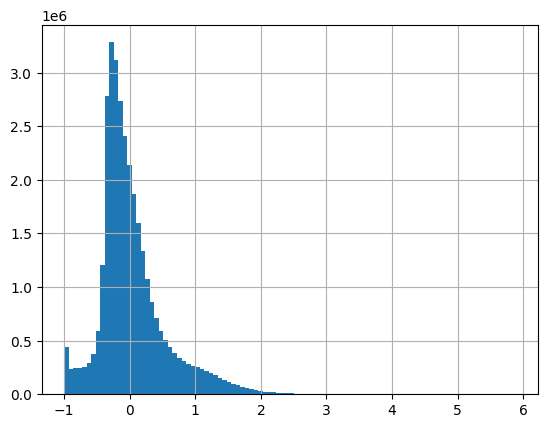

In [59]:
time_norm = (time_reset - 6000) / 6000
             
time_norm.hist(bins=100)

<AxesSubplot: >

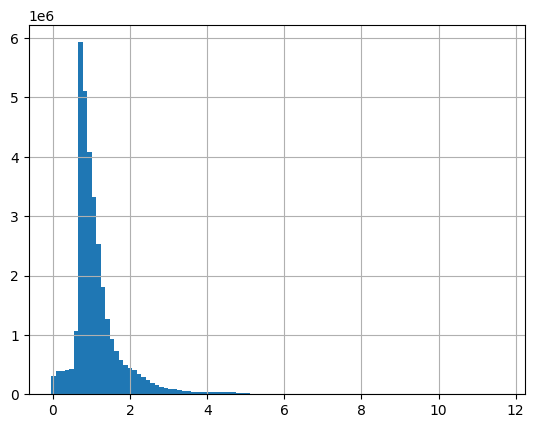

In [60]:
time_norm2 = (batch["time"] - 6000) / 6000
             
time_norm2.hist(bins=100)

<AxesSubplot: >

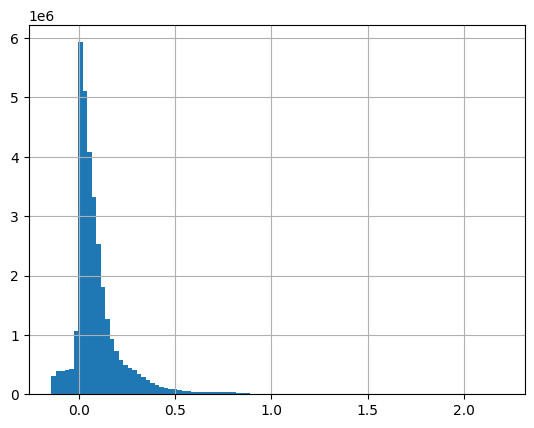

In [61]:
time_norm3 = (batch["time"] - 1e4) / 3e4  # GraphNet scaling
             
time_norm3.hist(bins=100)